In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')

In [39]:
data = pd.read_csv("Tv Shows.csv", header=None)
data.shape

(9690, 32)

In [40]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Cobra Kai,Lupin,12 Monkeys,Sherlock,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lost,Jack Ryan,The Flash,Game of thrones,House of Cards,12 Monkeys,Vikings,Fringe,The Mentalist,The Alienist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex Education,Dr. House,Kingdom,The Walking Dead,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ozark,Sex Education,Constantine,Preacher,Vikings,The Tick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naruto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9690,7557,5947,4667,3678,2837,2197,1664,1231,887,...,14,8,7,7,6,5,4,1,1,1
unique,156,145,147,145,142,130,132,133,122,115,...,13,7,6,7,5,4,3,1,1,1
top,Daredevil,Sex Education,Sex Education,Sex Education,Two and a half men,Outer Banks,Outer Banks,Lucifer,Outer Banks,Lucifer,...,Spartacus,Dark,Shadow and Bone,The Queen's Gambit,Big Little Lies,Chernobyl,Startup,You,Big Little Lies,Dark
freq,811,646,499,310,174,149,120,74,60,48,...,2,2,2,1,2,2,2,1,1,1


In [42]:
data[1]

0               Lupin
1           Jack Ryan
2           Dr. House
3       Sex Education
4                 NaN
            ...      
9685    The Blacklist
9686        Mr. Robot
9687         Atypical
9688     The Newsroom
9689              NaN
Name: 1, Length: 9690, dtype: object

# Data Visualizations

In [43]:
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

# 3. Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

# 5. Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Blues')

,items,incident_count
0,Sex Education,2477
1,Ozark,1877
2,Two and a half men,1779
3,Outer Banks,1696
4,Atypical,1356
5,Stranger Things,1070
6,Mr. Robot,1060
7,The Blacklist,1016
8,Lucifer,949
9,Daredevil,910


In [44]:
df_table["all"] = "all" 

fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Blues',
                  )
fig.show()

In [45]:

transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)


top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(data):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue
            

df_top20_multiple_record_check.head(10)

,Sex Education,Ozark,Two and a half men,Outer Banks,Atypical,Stranger Things,Mr. Robot,The Blacklist,Lucifer,Daredevil,Dark,The Walking Dead,Cobra Kai,How I met your mother,Absentia,Demon Slayer,The Mentalist,Family Guy,The Wire,Kingdom
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df_top20_multiple_record_check.describe()


,Sex Education,Ozark,Two and a half men,Outer Banks,Atypical,Stranger Things,Mr. Robot,The Blacklist,Lucifer,Daredevil,Dark,The Walking Dead,Cobra Kai,How I met your mother,Absentia,Demon Slayer,The Mentalist,Family Guy,The Wire,Kingdom
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,0.255624,0.193705,0.183591,0.175026,0.139938,0.110423,0.109391,0.104850,0.097936,0.093911,0.090093,0.088648,0.083075,0.080392,0.077090,0.075439,0.072549,0.071517,0.067905,0.065015
std,0.436234,0.395221,0.387171,0.380009,0.346941,0.313433,0.312145,0.306376,0.297243,0.291720,0.289556,0.284250,0.276010,0.271913,0.266748,0.264111,0.259408,0.257700,0.260068,0.246566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [47]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,0])

transaction = np.array(transaction)


df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1


indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

  
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["movie"] = "movie"
df_table_first = df_table_first.truncate(before=-1, after=15)

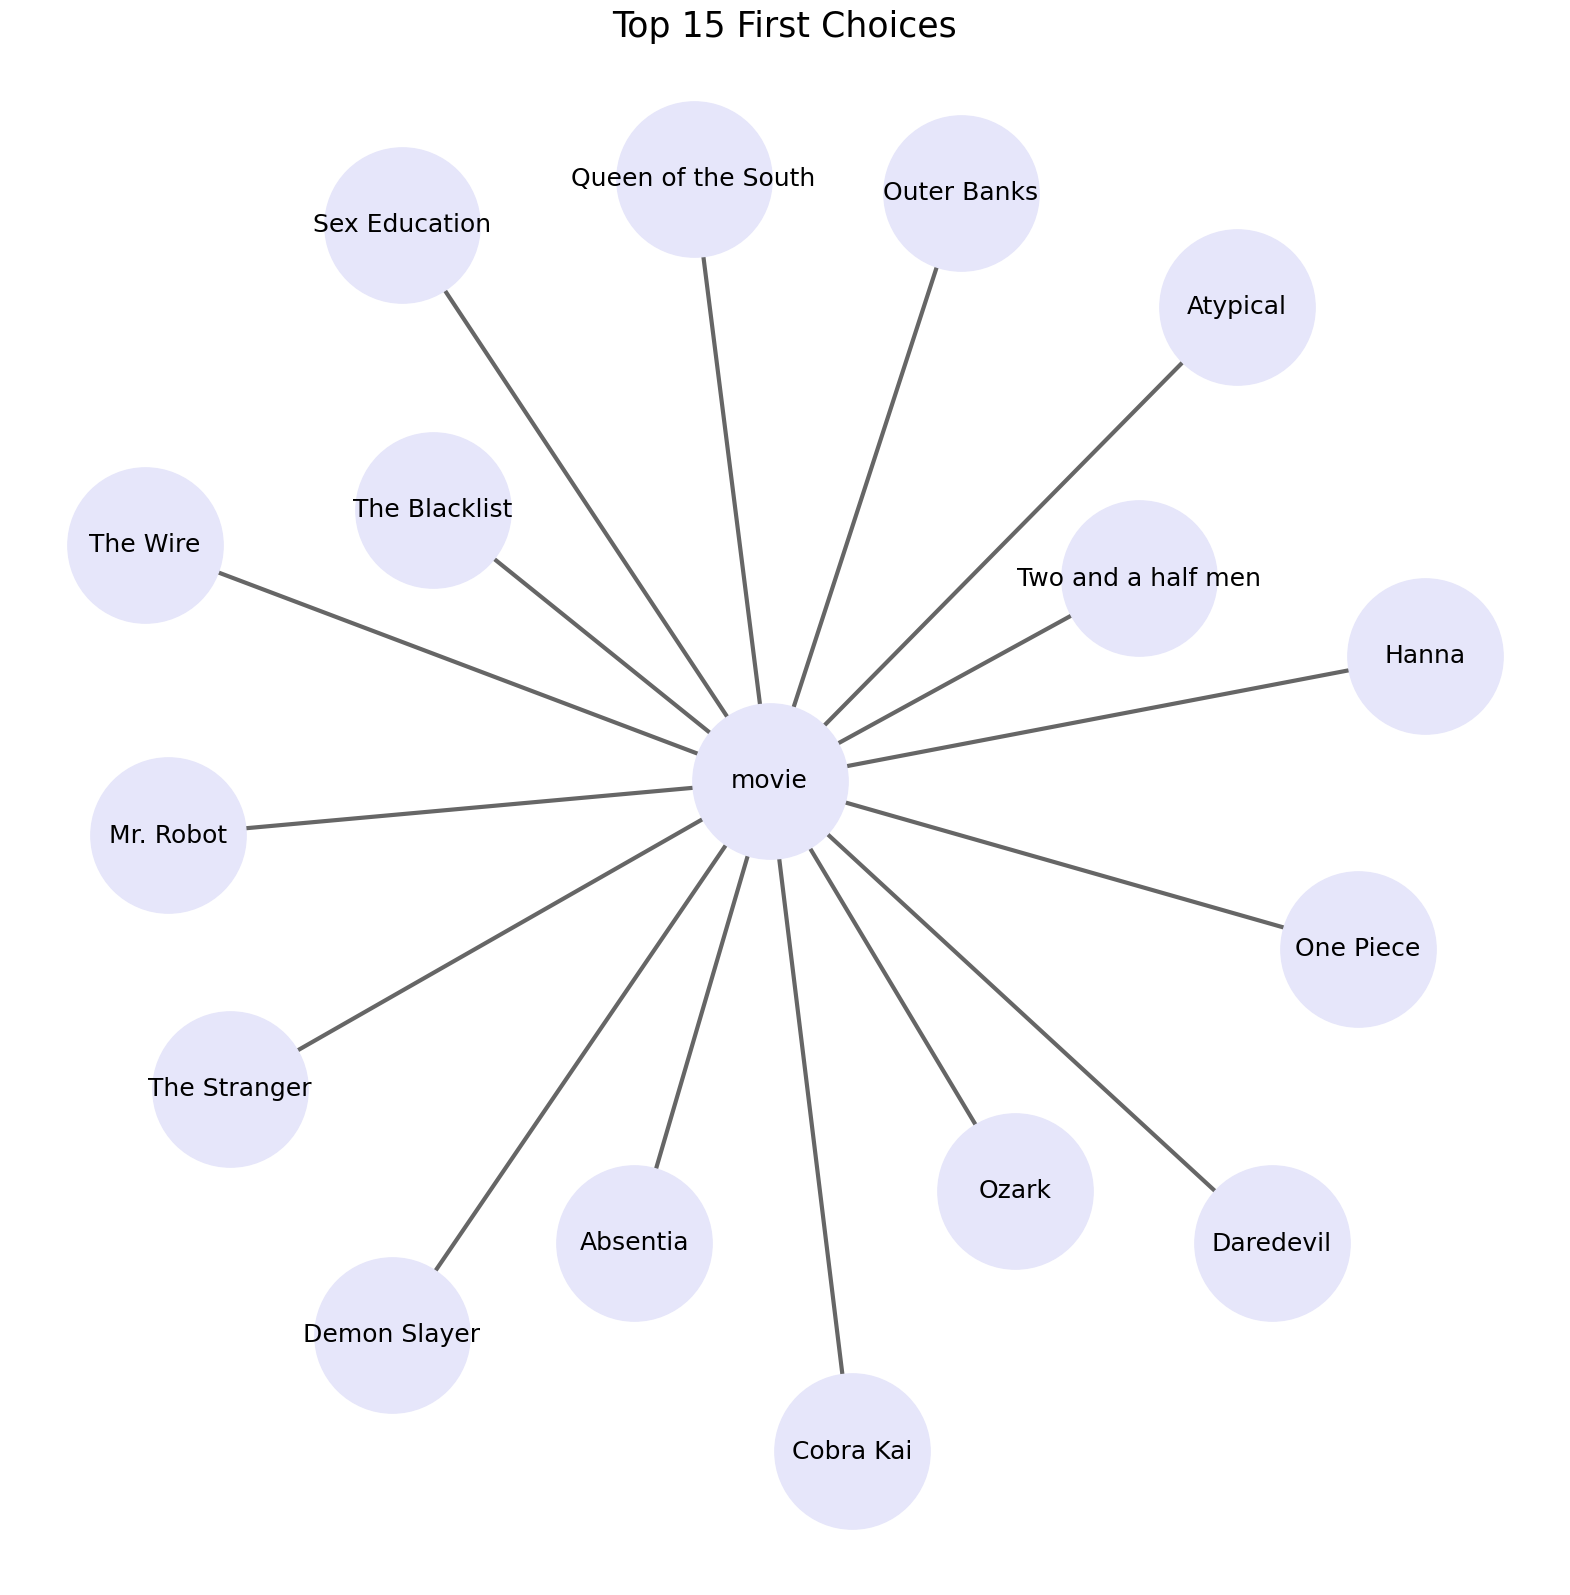

In [48]:
plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'movie', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 25)
plt.show()

In [49]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,1])

transaction = np.array(transaction)


df_second = pd.DataFrame(transaction, columns=["items"]) 
df_second["incident_count"] = 1


indexNames = df_second[df_second['items'] == "nan" ].index
df_second.drop(indexNames , inplace=True)

 
df_table_second = df_second.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_second["movie"] = "movie"
df_table_second = df_table_second.truncate(before=-1, after=15)

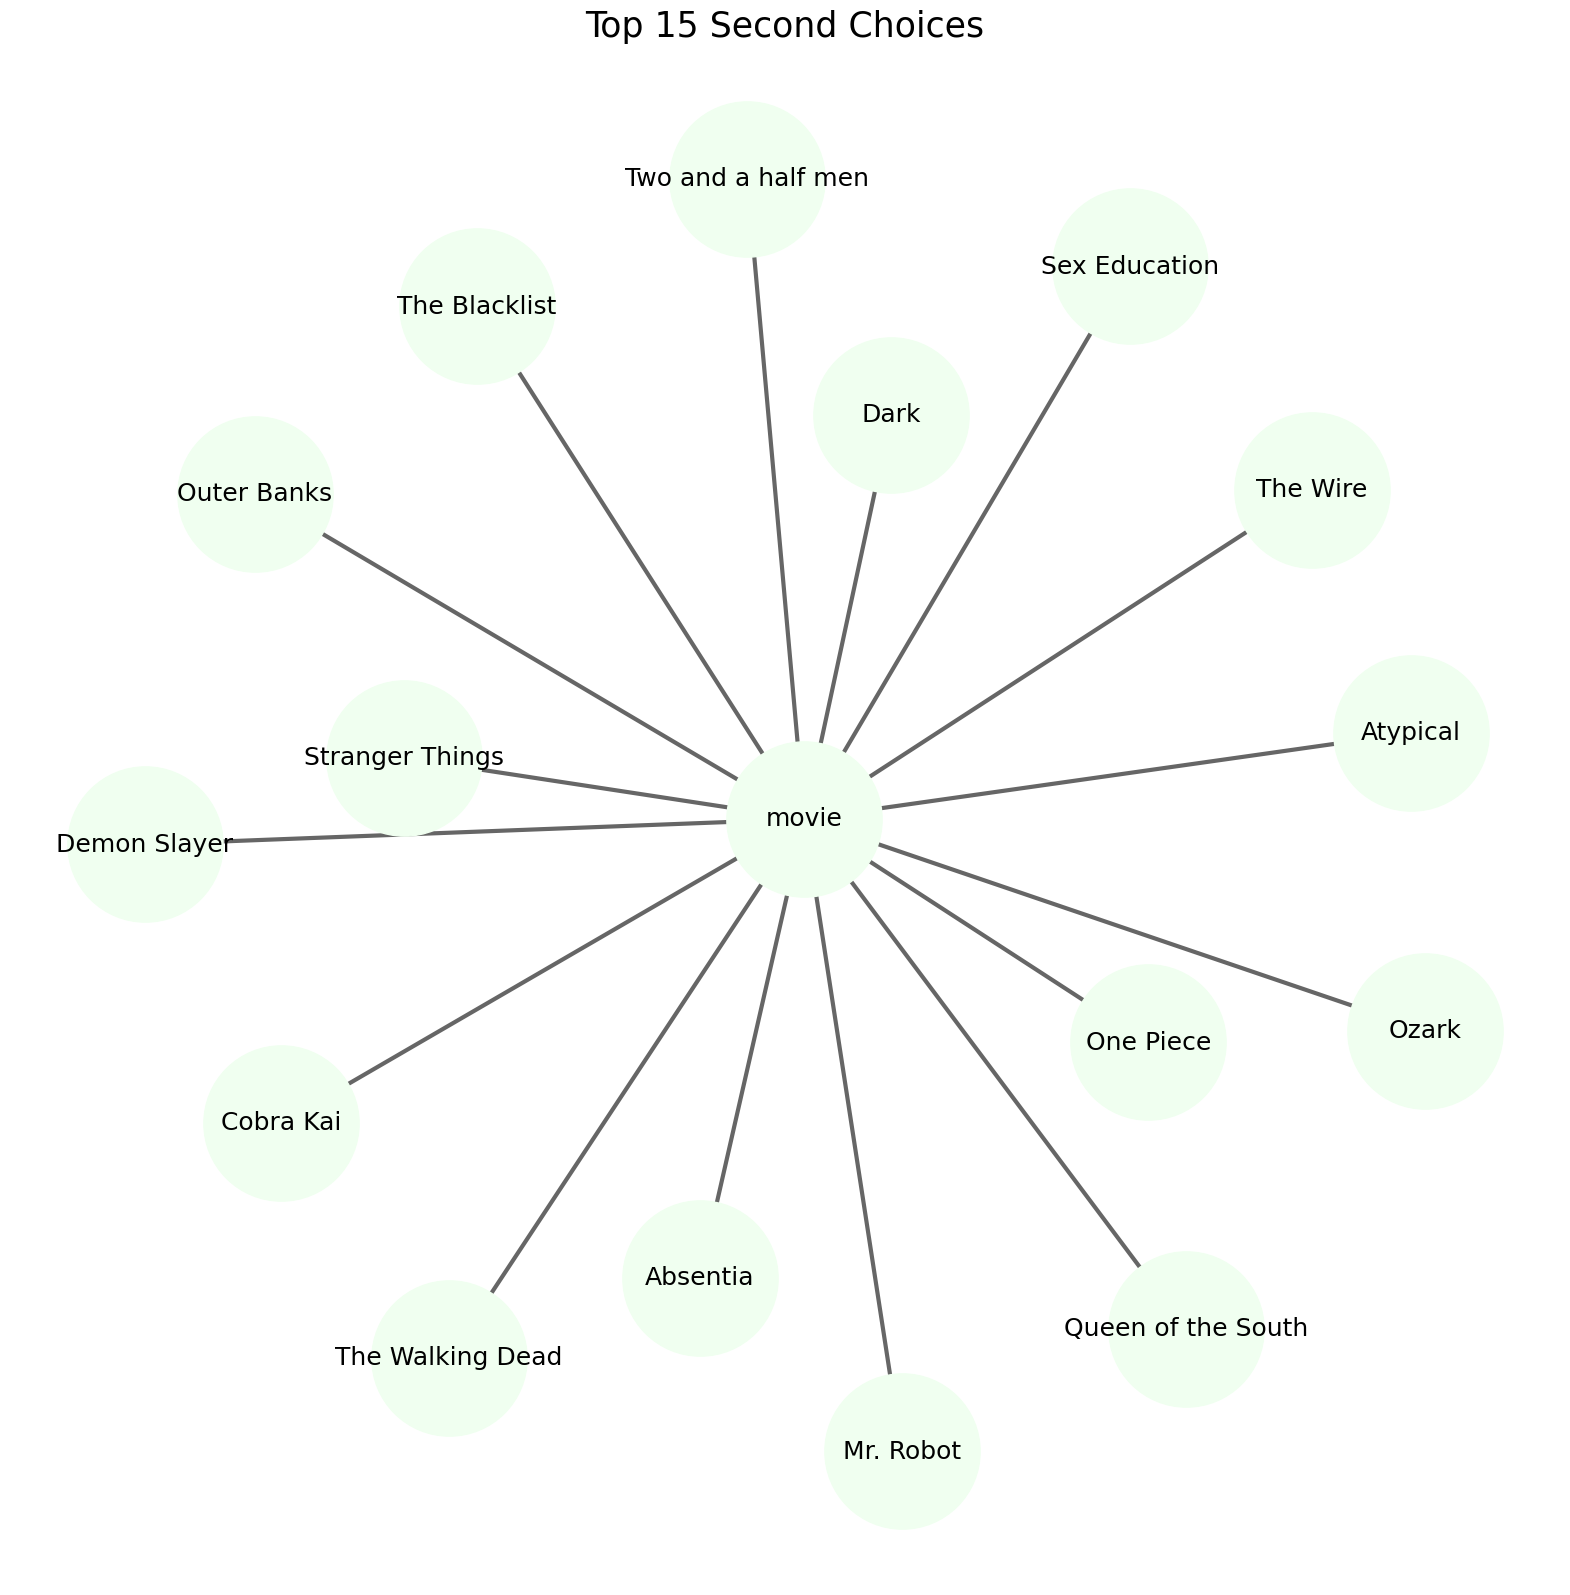

In [50]:
second_choice = nx.from_pandas_edgelist(df_table_second, source = 'movie', target = "items", edge_attr = True)
pos = nx.spring_layout(second_choice)
nx.draw_networkx_nodes(second_choice, pos, node_size = 12500, node_color = "honeydew")
nx.draw_networkx_edges(second_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(second_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.rcParams['figure.figsize'] = (20, 20)
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 25)
plt.show()

In [51]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,2])

transaction = np.array(transaction)


df_third = pd.DataFrame(transaction, columns=["items"])
df_third["incident_count"] =


indexNames = df_third[df_third['items'] == "nan" ].index
df_third.drop(indexNames , inplace=True)

  
df_table_third = df_third.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_third["movie"] = "movie"
df_table_third = df_table_third.truncate(before=-1, after=15) 

In [52]:
fig = go.Figure(data=[go.Bar(x=df_table_third["items"], y=df_table_third["incident_count"],
            hovertext=df_table_third["items"], text=df_table_third["incident_count"], textposition="outside")])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.65)
fig.update_layout(title_text="Customers' Third Choices", template="plotly_dark")
fig.show()

# Data Pre-Processing

In [65]:
transaction = []

for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)

transaction

array([['Cobra Kai', 'Lupin', '12 Monkeys', ..., 'nan', 'nan', 'nan'],
       ['Lost', 'Jack Ryan', 'The Flash', ..., 'nan', 'nan', 'nan'],
       ['Sex Education', 'Dr. House', 'Kingdom', ..., 'nan', 'nan',
        'nan'],
       ...,
       ['Daredevil', 'Atypical', 'Heros', ..., 'nan', 'nan', 'nan'],
       ['Absentia', 'The Newsroom', 'The Alienist', ..., 'nan', 'nan',
        'nan'],
       ['Atypical', 'nan', 'nan', ..., 'nan', 'nan', 'nan']], dtype='<U28')

In [54]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon,nan
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
9686,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
9687,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
9688,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [55]:
dataset.shape

(9690, 157)

In [66]:
first50 = df_table["items"].head(50).values 
dataset = dataset.loc[:,first50] 
dataset

,Sex Education,Ozark,Two and a half men,Outer Banks,Atypical,Stranger Things,Mr. Robot,The Blacklist,Lucifer,Daredevil,...,White Collar,Big Little Lies,Succession,Designated Survivor,The Night Manager,Mare of Easttown,Doctor Who,Only Murders in the building,Travellers,Brooklyn Nine Nine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9686,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9687,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
dataset.columns

Index(['Sex Education', 'Ozark', 'Two and a half men', 'Outer Banks',
       'Atypical', 'Stranger Things', 'Mr. Robot', 'The Blacklist', 'Lucifer',
       'Daredevil', 'Dark', 'The Walking Dead', 'Cobra Kai',
       'How I met your mother', 'Absentia', 'Demon Slayer', 'The Mentalist',
       'Family Guy', 'The Wire', 'Kingdom', 'Dr. House', 'Hanna', '12 Monkeys',
       'One Piece', 'Archer', 'Berlin Station', 'Jack Ryan',
       'Queen of the South', 'Chernobyl', 'Shadow and Bone', 'Deception',
       'The Stranger', 'Preacher', 'Spartacus', 'Banshee',
       'How to get away with murder', 'Constantine', 'Vikings', 'Lost',
       'Rick And Morty', 'White Collar', 'Big Little Lies', 'Succession',
       'Designated Survivor', 'The Night Manager', 'Mare of Easttown',
       'Doctor Who', 'Only Murders in the building', 'Travellers',
       'Brooklyn Nine Nine'],
      dtype='object')

In [69]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)


,Sex Education,Ozark,Two and a half men,Outer Banks,Atypical,Stranger Things,Mr. Robot,The Blacklist,Lucifer,Daredevil,...,White Collar,Big Little Lies,Succession,Designated Survivor,The Night Manager,Mare of Easttown,Doctor Who,Only Murders in the building,Travellers,Brooklyn Nine Nine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 

In [70]:
#Filtreleme kolaylığını artırmak için uzunluk sütunu ekleme
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


C:\Users\caner\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.255624,(Sex Education),1
1,0.193705,(Ozark),1
2,0.183591,(Two and a half men),1
3,0.175026,(Outer Banks),1
4,0.139938,(Atypical),1
...,...,...,...
303,0.013003,"(Mr. Robot, Ozark, Atypical)",3
304,0.012487,"(Ozark, The Blacklist, Atypical)",3
305,0.010217,"(Family Guy, Ozark, Atypical)",3
306,0.012487,"(Mr. Robot, Ozark, The Blacklist)",3


In [72]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
50,0.075129,"(Sex Education, Ozark)",2
51,0.056553,"(Sex Education, Two and a half men)",2
53,0.056140,"(Sex Education, Atypical)",2


In [73]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
274,0.018163,"(Sex Education, Ozark, Two and a half men)",3
275,0.014035,"(Sex Education, Ozark, Outer Banks)",3
276,0.022394,"(Sex Education, Ozark, Atypical)",3
277,0.010733,"(Sex Education, Ozark, Stranger Things)",3
278,0.023117,"(Sex Education, Mr. Robot, Ozark)",3


In [74]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
500,(Jack Ryan),"(Sex Education, Atypical)",0.053767,0.056140,0.010217,0.190019,3.384717,0.007198,1.165286,1,2
497,"(Sex Education, Atypical)",(Jack Ryan),0.056140,0.053767,0.010217,0.181985,3.384717,0.007198,1.156744,2,1
551,"(Cobra Kai, Ozark)",(Mr. Robot),0.028896,0.109391,0.010423,0.360714,3.297473,0.007262,1.393131,2,1
554,(Mr. Robot),"(Cobra Kai, Ozark)",0.109391,0.028896,0.010423,0.095283,3.297473,0.007262,1.073379,1,2
540,"(Ozark, Atypical)",(Family Guy),0.043756,0.071517,0.010217,0.233491,3.264825,0.007087,1.211313,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2,(Sex Education),(Two and a half men),0.255624,0.183591,0.056553,0.221235,1.205043,0.009623,1.048338,1,1
77,(Two and a half men),(Ozark),0.183591,0.193705,0.042828,0.233277,1.204292,0.007265,1.051612,1,1
76,(Ozark),(Two and a half men),0.193705,0.183591,0.042828,0.221097,1.204292,0.007265,1.048153,1,1
84,(Ozark),(Lucifer),0.193705,0.097936,0.022807,0.117741,1.202224,0.003836,1.022448,1,1


In [75]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
545,"(Mr. Robot, The Blacklist)",(Ozark),0.021053,0.193705,0.012487,0.593137,3.062067,0.008409,1.981737,2,1
550,"(Cobra Kai, Mr. Robot)",(Ozark),0.017750,0.193705,0.010423,0.587209,3.031464,0.006985,1.953278,2,1
498,"(Jack Ryan, Atypical)",(Sex Education),0.017441,0.255624,0.010217,0.585799,2.291639,0.005758,1.797135,2,1
446,"(Jack Ryan, Ozark)",(Sex Education),0.017337,0.255624,0.010010,0.577381,2.258709,0.005578,1.761340,2,1
440,"(Berlin Station, Ozark)",(Sex Education),0.020124,0.255624,0.011558,0.574359,2.246887,0.006414,1.748834,2,1
...,...,...,...,...,...,...,...,...,...,...,...
393,(Sex Education),"(Daredevil, Ozark)",0.255624,0.026935,0.010217,0.039968,1.483858,0.003331,1.013575,1,2
435,(Sex Education),"(One Piece, Ozark)",0.255624,0.021775,0.010217,0.039968,1.835484,0.004650,1.018950,1,2
499,(Sex Education),"(Jack Ryan, Atypical)",0.255624,0.017441,0.010217,0.039968,2.291639,0.005758,1.023465,1,2
487,(Sex Education),"(Cobra Kai, Atypical)",0.255624,0.021569,0.010114,0.039564,1.834330,0.004600,1.018737,1,2


In [84]:
rules[~rules["consequents"].str.contains("Sex Education", regex=False) & 
      ~rules["antecedents"].str.contains("Sex Education", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
545,"(Mr. Robot, The Blacklist)",(Ozark),0.021053,0.193705,0.012487,0.593137,3.062067,0.008409,1.981737,2,1
550,"(Cobra Kai, Mr. Robot)",(Ozark),0.017750,0.193705,0.010423,0.587209,3.031464,0.006985,1.953278,2,1
521,"(Mr. Robot, Two and a half men)",(Ozark),0.024561,0.193705,0.012384,0.504202,2.602938,0.007626,1.626256,2,1
527,"(Mr. Robot, Atypical)",(Ozark),0.025903,0.193705,0.013003,0.501992,2.591531,0.007986,1.619041,2,1
539,"(Family Guy, Atypical)",(Ozark),0.020743,0.193705,0.010217,0.492537,2.542721,0.006199,1.588876,2,1
142,(Succession),(Ozark),0.031373,0.193705,0.014345,0.457237,2.360482,0.008268,1.485538,1,1
80,(Mr. Robot),(Ozark),0.109391,0.193705,0.047575,0.434906,2.245198,0.026385,1.426833,1,1
534,"(The Blacklist, Atypical)",(Ozark),0.029618,0.193705,0.012487,0.421603,2.176522,0.006750,1.394016,2,1
138,(Lost),(Ozark),0.033333,0.193705,0.014035,0.421053,2.173681,0.007578,1.392692,1,1
124,(The Stranger),(Ozark),0.043034,0.193705,0.018060,0.419664,2.166514,0.009724,1.389360,1,1


In [85]:
rules[rules["antecedents"].str.contains("Mr. Robot", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
9,(Mr. Robot),(Sex Education),0.109391,0.255624,0.048916,0.447170,1.749324,0.020953,1.346482,1,1
80,(Mr. Robot),(Ozark),0.109391,0.193705,0.047575,0.434906,2.245198,0.026385,1.426833,1,1
192,(Mr. Robot),(Atypical),0.109391,0.139938,0.025903,0.236792,1.692123,0.010595,1.126904,1,1
150,(Mr. Robot),(Two and a half men),0.109391,0.183591,0.024561,0.224528,1.222979,0.004478,1.052790,1,1
382,(Mr. Robot),"(Sex Education, Ozark)",0.109391,0.075129,0.023117,0.211321,2.812772,0.014898,1.172683,1,2
250,(Mr. Robot),(The Blacklist),0.109391,0.104850,0.021053,0.192453,1.835500,0.009583,1.108480,1,1
255,(Mr. Robot),(Cobra Kai),0.109391,0.083075,0.017750,0.162264,1.953217,0.008663,1.094527,1,1
280,(Mr. Robot),(Queen of the South),0.109391,0.052632,0.017337,0.158491,3.011321,0.011580,1.125797,1,1
262,(Mr. Robot),(Family Guy),0.109391,0.071517,0.016925,0.154717,2.163359,0.009101,1.098429,1,1
259,(Mr. Robot),(Demon Slayer),0.109391,0.075439,0.015583,0.142453,1.888328,0.007331,1.078146,1,1
